In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(100)

### Exercise 1
How likely is it that you roll doubles when rolling two dice?

In [3]:
n_rows = 10_0000
n_cols = 2 # to represent rolling two dice per each simulation
rolls = np.random.choice([1, 2, 3, 4, 5, 6], size=(n_rows, n_cols))
rolls = pd.DataFrame(rolls, columns=["die1", "die2"])
rolls.head()

,die1,die2
0,1,1
1,4,1
2,3,5
3,3,6
4,3,3


In [4]:
# How many outcomes from die match eachother?
# What's the chance of rolling doubles
(rolls.die1 == rolls.die2).mean()

0.16657

## Exercise 2

If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?


In [5]:
n_rows = 10_000
n_cols = 8 # for flipping 8 coins at once
flips = np.random.choice(["Heads", "Tails"], size=(10_000, 8))
flips = pd.DataFrame(flips)

In [7]:
(flips == "Heads").head()

,0,1,2,3,4,5,6,7
0,False,True,True,True,True,False,False,False
1,False,True,False,True,True,True,True,True
2,False,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False,True
4,False,False,True,False,True,False,True,True


In [8]:
flips["n_heads"] = (flips == "Heads").sum(axis=1)
flips.head()

,0,1,2,3,4,5,6,7,n_heads
0,Tails,Heads,Heads,Heads,Heads,Tails,Tails,Tails,4
1,Tails,Heads,Tails,Heads,Heads,Heads,Heads,Heads,6
2,Tails,Tails,Heads,Tails,Tails,Tails,Tails,Heads,2
3,Tails,Tails,Tails,Tails,Tails,Tails,Tails,Heads,1
4,Tails,Tails,Heads,Tails,Heads,Tails,Heads,Heads,4


In [9]:
# What's the probability of getting exactly 3 heads?
(flips.n_heads == 3).mean()

0.2164

In [10]:
# What's the probability of getting more than 3 heads
(flips.n_heads > 3).mean()

0.6357

## Exercise 3
There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?


In [11]:
n_rows = 10_000
n_cols = 2 # for 2 billboards in a row

billboards = np.random.choice(["Web Development", "Data Science"], p=[.75, .25], size=(n_rows, n_cols))
billboards = pd.DataFrame(billboards)

In [12]:
billboards["number_of_data_science"] = (billboards == "Data Science").sum(axis=1)
(billboards.number_of_data_science == 2).mean()

0.0627

## Exercise 4
Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? (Remember, if you have mean and standard deviation, use the np.random.normal)

In [14]:
n_rows = 10_000
n_cols = 5 # to represent a 5 day week
µ = 3
σ = 1.5
poptarts = np.random.normal(µ, σ, size=(n_rows, n_cols)).round()
poptarts = pd.DataFrame(poptarts, columns=["Mon", "Tues", "Wed", "Thur", "Fri"])
poptarts.head()

,Mon,Tues,Wed,Thur,Fri
0,5.0,3.0,5.0,1.0,3.0
1,5.0,3.0,4.0,3.0,3.0
2,3.0,2.0,2.0,1.0,3.0
3,1.0,3.0,2.0,2.0,8.0
4,4.0,1.0,2.0,3.0,4.0


In [ ]:
poptarts["n_consumed"] = poptarts.sum(axis=1)
poptarts.head()

In [ ]:
# What's the chance we can buy poptarts on Friday afternoon
# This setup would predicate 
(poptarts.n_consumed < 17).mean()

## Exercise 5
Compare Heights

- Men have an average height of 178 cm and standard deviation of 8cm.
- Women have a mean of 170, sd = 6cm.

Since you have means and standard deviations, you can use np.random.normal to generate observations.

- If a man and woman are chosen at random, what is the likelihood the woman is taller than the man?

In [17]:
m_heights = np.random.normal(178, 8, size=10_000)
f_heights = np.random.normal(170, 6, size=10_000)
(f_heights > m_heights).mean()

0.2089

## Exercise 6
When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. 

- What are the odds that after having 50 students download anaconda, no one has an installation issue? 

- 100 students?

- What is the probability that we observe an installation issue within the first 150 students that download anaconda?

- How likely is it that 450 students all download anaconda without an issue?

In [18]:
# Probability of no install issues
n_rows = 100_000
n_columns = 50

installs = np.random.choice([0, 1], p=[0.004, 0.996], size=(n_rows, n_columns))

(installs.sum(axis=1) == 50).mean()

0.81969

In [19]:
# Probability of no installs on 100 students?
n_columns = 100

installs = np.random.choice([0, 1], p=[0.004, 0.996], size=(n_rows, n_columns))

(installs.sum(axis=1) == 100).mean()

0.66714

In [20]:
# What about 150 installs w/ no issues
n_columns = 150

installs = np.random.choice([0, 1], p=[0.004, 0.996], size=(n_rows, n_columns))

(installs.sum(axis=1) == 150).mean()


0.5484

In [22]:
# What about 450 installs w/ no issues
n_columns = 450

installs = np.random.choice([0, 1], p=[0.004, 0.996], size=(n_rows, n_columns))

(installs.sum(axis=1) == 450).mean()


0.16595

## Exercise 7
There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?
How likely is it that a food truck will show up sometime this week?

In [23]:
n_rows = 10_000
n_cols = 3 # to represent 3 days in a row

trucks = np.random.choice([1, 0], size=(n_rows, n_cols), p=[0.7, 0.3])

In [24]:
# What's the probability of not seeing a food truck in 3 days?
(trucks.sum(axis=1) == 0).mean()

0.025

In [25]:
# What's the probability of seeing a food truck in the next 2 days?
# Food truck presence (in this setup is independent)
n_cols = 2 # to represent 2 days in a row

trucks = np.random.choice([1, 0], size=(n_rows, n_cols), p=[0.7, 0.3])
(trucks.sum(axis=1) > 0).mean()

0.912

In [26]:
# What's the probability of seeing a food truck in the next 2 days?
# Food truck presence (in this setup is independent)
n_cols = 5 # to represent 2 days in a row

trucks = np.random.choice([1, 0], size=(n_rows, n_cols), p=[0.7, 0.3])
(trucks.sum(axis=1) > 0).mean()

0.9971

## Exercise 8
If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?


In [28]:
n_rows = 10_000
n_cols = 23 # to represent 23 individuals

birthdays = np.random.choice(range(365), size=(n_rows, n_cols))
birthdays = pd.DataFrame(birthdays)
birthdays["n_unique"] = birthdays.nunique(axis=1)

# What's the proportion of rows where we have multiple shared days
(birthdays.n_unique != 23).mean()

0.5004

In [29]:
n_rows = 10_000
n_cols = 20 # to represent 20 individuals

birthdays = np.random.choice(range(365), size=(n_rows, n_cols))
birthdays = pd.DataFrame(birthdays)
birthdays["n_unique"] = birthdays.nunique(axis=1)

# What's the proportion of rows where we have multiple shared days
(birthdays.n_unique != 20).mean()

0.4212

In [30]:
n_rows = 10_000
n_cols = 40 # to represent 40 individuals

birthdays = np.random.choice(range(365), size=(n_rows, n_cols))
birthdays = pd.DataFrame(birthdays)
birthdays["n_unique"] = birthdays.nunique(axis=1)

# What's the proportion of rows where we have multiple shared days
(birthdays.n_unique != 40).mean()

0.8848

## Let's Graph this one out!

In [31]:
# What if we have rooms of increasing size

x = range(1, 100)

# N will be a list of N for each room size
N = [n * (n-1) / 2 for n in x]

# Get the probability for each N
y = [1 - (364/365)**n for n in N]

Text(0, 0.5, 'Probability')

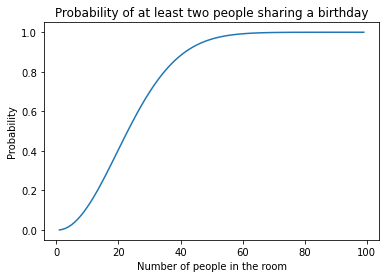

In [32]:
import matplotlib.pyplot as plt

plt.title("Probability of at least two people sharing a birthday")
plt.plot(x, y)
plt.xlabel("Number of people in the room")
plt.ylabel("Probability")